# Homework2a
## Bowen Zhang bz896

### Part 1
* This dataset is about the consumer service complaint.
* The link is: https://data.cityofnewyork.us/Business/Consumer-Services-Mediated-Complaints/nre2-6m2s
* I am interested in this data set because I want to know why people would like to ask customer for help. I am also interested in knowing whether the customer service solved the problem finally nor not. 
* questions
(1) Which industry receives the most complaint?
(2) What is the percent of satisfied customer service?
(3) What are the first 5 states that receives most complaint?

In [34]:
import csv

class Data:
    def __init__(self, filename):
        file = []
        with open(filename, 'r') as f:
            data = csv.DictReader(f)
            for row in data:
                file.append(row)
        self.data = file
    
    def removeCol(self, *args):
        cols = []
        for i in args:
            cols.append(i)
        
        for i in range(len(self.data)):
            cur = self.data[i]
            for j in cols:
                del cur[j]
                
    def count(self, column):
        rank = {}
        for i in self.data:
            key = i[column]
            if key in rank:
                rank[key] += 1
            else:
                rank[key] = 1
        return rank
    
    def sort(slef, rank):
        sorted_by_value = sorted(rank.items(), key=lambda kv: kv[1], reverse = True)
        return sorted_by_value

There are 17 columns/headers in this file, they are: 
* Business Name	Industry: the name of the industry that is complained.        Data type: String.
* Industry: The business category that a complaint has been made.           Data type: String.
* Complaint Type: the type of complaint that customer made.               Data type: String.
* Mediation Start Date: The date that mediation started.                 Data type: String.
* Mediation Close Date: The date that mediation closed.                  Data type: String.
* Complaint Result: Outcome of mediation efforts.                      Data type: String.
* Satisfaction: Customer is satisfied or not.                         Data type: Boolean(represented as Yes or No String).
* Restitution: Total amount of consumer restitution secured through mediation.   Data type: Number(Integer).
* Business Building: The building # of business's address.                Data Type: Number(Integer).
* Business Street: The name of street of business's address.               Data type: String.
* Building Address Unit: The Unit # of business's address.                Data type: Number(Integer).
* Business City: The city name where the business is located.              Data type: String.
* Business State: The state name where the business is located.             Data type: String.
* Business Zip: The zip code of the business.                         Data type: Number(Integer).
* Complainant Zip: The zip of complaints.                            Data type: Number(Integer).
* Longitude: The longtitue of the business.                          Data type: Number(Float).
* Latitude: The latitude of the business.                            Data type: Number(Float).

First I have to delete columns that don't help with the assignment. 
Then, I will clean out pieces of data which lack any of these fields: Complaint Type, Business City, Business State, Mediation Start Date， Complaint Result and Satisfaction.

### Part 2

In [35]:
file = Data('Consumer_Services_Mediated_Complaints.csv')

In [36]:
file.removeCol("Business Name", "Restitution", "Business Building", "Business Street", "Building Address Unit", "Business Zip", "Complainant Zip ", "Longitude","Latitude")
    
#remove unnecessary data from the dataset

In [37]:
file.data[27]

OrderedDict([('Industry', 'Home Improvement Contractor - 100'),
             ('Complaint Type', 'Non-Delivery of Goods - N01'),
             ('Mediation Start Date', '11/03/2017'),
             ('Mediation Close Date', '12/04/2017'),
             ('Complaint Result', 'No Satisfactory Agreement - NSA'),
             ('Satisfaction', 'No'),
             ('Business City', ''),
             ('Business State', '')])

Now, remove data which does not have "business city" or "business state" or "Complaint Type"

In [40]:
for i in file.data:
    if(i["Business City"] == '' or i["Business State"] == '' or i["Complaint Type"] == ''):
        file.data.remove(i)

In [41]:
len(file.data)

4436

### Part 3

(1) Which industry receives the most complaint?

In [42]:
industry_rank = file.count("Industry")

In [43]:
industry_rank

{'Travel Agency - 440': 57,
 'Furniture Sales - 242': 371,
 'Garage - 049': 182,
 'Secondhand Dealer Auto - 005': 323,
 'Jewelry Store-Retail - 823': 42,
 'Laundry - 064': 24,
 'Home Improvement Contractor - 100': 708,
 'Tow Truck Company - 124': 506,
 'Supermarket - 819': 37,
 'Misc Non-Food Retail - 817': 497,
 'Appliances - 244': 106,
 'Garage & Parking Lot - 098': 25,
 'Dry Cleaners - 230': 98,
 'Debt Settlement - 248': 22,
 'Debt Collection Agency - 122': 310,
 'Electronic Store - 001': 401,
 'Employment Agency - 034': 59,
 'Health Spa - 839': 26,
 'Tax Preparers - 891': 37,
 'Other': 63,
 'Pawnbroker - 080': 30,
 'Retail Store - 820': 64,
 'Restaurant - 818': 43,
 'Electronic & Home Appliance Service Dealer - 115': 73,
 'Hotel/Motel - 460': 34,
 'Fuel Oil Dealer - 814': 13,
 'Locksmith - 062': 16,
 'Mailorder Misc - 319': 67,
 'Auction House - 128': 16,
 'Wearing Apparel - 450': 15,
 'Auto Rental - 213': 17,
 'Grocery-Retail - 808': 11,
 'Dealer In Products For The Disabled - 119

(-1.100038619947528,
 1.1000018390747799,
 -1.1029967535903715,
 1.114764762330221)

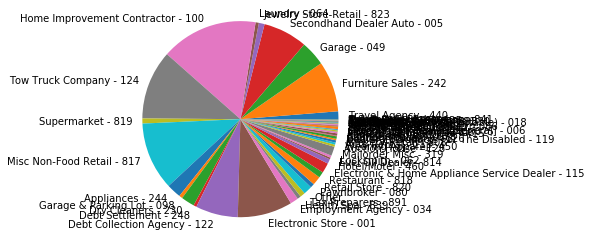

In [44]:
import matplotlib.pyplot as plt
plt.pie(industry_rank.values(), labels = industry_rank.keys())
plt.axis('equal')

Extra Credit:(Incorporate 2 graphes in homework)

From above we can see that "Home Improvement Contractor" is the industry which receives most complaint. We can also sort the array and see what's exact the number of complaint it received.

In [46]:
file.sort(industry_rank)[:5]

[('Home Improvement Contractor - 100', 708),
 ('Tow Truck Company - 124', 506),
 ('Misc Non-Food Retail - 817', 497),
 ('Electronic Store - 001', 401),
 ('Furniture Sales - 242', 371)]

So, the Home Improvement Contractor receives the most complaints. And the exact number is 709.

(2) What is the percent of satisfied customer service? 

In [48]:
satisfy = file.count("Satisfaction")

In [51]:
satisfy

{'Yes': 2301, 'NA': 884, 'No': 1251}

(-1.1095343772067277,
 1.100454017962225,
 -1.1102475940728374,
 1.107065063517816)

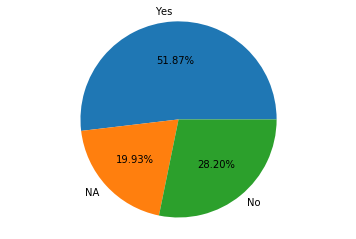

In [52]:
plt.pie(satisfy.values(), labels = satisfy.keys(), autopct="%.2f%%")
plt.axis('equal')

Therefore, we can see that the percentage of satisfied customer support is 51.90%.

(3) What are the first 5 states which receives most complaint?

In [53]:
state_rank = file.count("Business State")

(-1.1051839326037853,
 1.1002468539559405,
 -1.1065118891398833,
 1.1061348225763574)

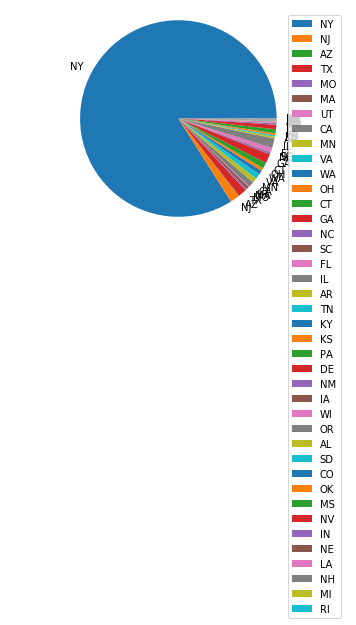

In [54]:
plt.pie(state_rank.values(), labels = state_rank.keys())
plt.legend(loc = "upper right")
plt.axis('equal')

From the cart, we can see that in this data set, majority of the companies which receive complaints are from New York State.

In [55]:
file.sort(state_rank)[:5]

[('NY', 3726), ('IL', 70), ('NJ', 68), ('GA', 67), ('TX', 62)]

So, the first 5 states are NY with 3729 complaints, IL with 70 complaints, NJ with 68 complaints, GA with 67 complaints and TX with 62 complaints